In [ ]:
'''Experiment-4
•	Load the Iris dataset and normalize the numerical features using MinMaxScaler. Display the transformed dataset.
•	Discretize the 'PetalLengthCm' column into three categories: short, medium, and long. Display the updated dataset.
•	Perform univariate analysis on the 'SepalLengthCm' column by calculating its mean, median, standard deviation, and percentiles. Visualize its distribution using a histogram.
•	Perform similar analysis on the 'Species' column (categorical data). Visualize the frequency distribution using a bar plot.
•	Perform a chi-square test to determine if there is a significant relationship between 'Species' and the discretized 'PetalLengthCm'. Display the test results.'''

In [18]:
import pandas as pd
from sklearn.datasets import load_iris
from sklearn.preprocessing import MinMaxScaler, KBinsDiscretizer
from scipy.stats import chi2_contingency
import matplotlib.pyplot as plt
import seaborn as sns

In [19]:
iris = pd.read_csv(r"C:\Users\Lokesh Patra\Documents\Data Science\Iris - Iris.csv")

In [20]:
iris

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...,...
145,146,6.7,3.0,5.2,2.3,Iris-virginica
146,147,6.3,2.5,5.0,1.9,Iris-virginica
147,148,6.5,3.0,5.2,2.0,Iris-virginica
148,149,6.2,3.4,5.4,2.3,Iris-virginica


In [32]:
#Transformation
scaler = MinMaxScaler()
iris[['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm']] = scaler.fit_transform(iris[['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm']])

In [22]:
iris.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,0.222222,0.625000,0.067797,0.041667,Iris-setosa
1,2,0.166667,0.416667,0.067797,0.041667,Iris-setosa
2,3,0.111111,0.500000,0.050847,0.041667,Iris-setosa
3,4,0.083333,0.458333,0.084746,0.041667,Iris-setosa
4,5,0.194444,0.666667,0.067797,0.041667,Iris-setosa


In [23]:
#Discretization
bins = [0, 0.33, 0.66, 1]
labels = ['Short', 'Medium', 'Long']

iris['PetalLengthCat'] = pd.cut(iris['PetalLengthCm'], bins=bins, labels=labels)

In [24]:
iris.head(150)

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species,PetalLengthCat
0,1,0.222222,0.625000,0.067797,0.041667,Iris-setosa,Short
1,2,0.166667,0.416667,0.067797,0.041667,Iris-setosa,Short
2,3,0.111111,0.500000,0.050847,0.041667,Iris-setosa,Short
3,4,0.083333,0.458333,0.084746,0.041667,Iris-setosa,Short
4,5,0.194444,0.666667,0.067797,0.041667,Iris-setosa,Short
...,...,...,...,...,...,...,...
145,146,0.666667,0.416667,0.711864,0.916667,Iris-virginica,Long
146,147,0.555556,0.208333,0.677966,0.750000,Iris-virginica,Long
147,148,0.611111,0.416667,0.711864,0.791667,Iris-virginica,Long
148,149,0.527778,0.583333,0.745763,0.916667,Iris-virginica,Long


In [25]:
# Univariation on 'SepalLengthCm'
print("Mean:", iris['SepalLengthCm'].mean())
print("Median:", iris['SepalLengthCm'].median())
print("Standard Deviation:", iris['SepalLengthCm'].std())
print("Percentiles:", iris['SepalLengthCm'].quantile([0.25, 0.5, 0.75]))

Mean: 0.42870370370370364
Median: 0.4166666666666665
Standard Deviation: 0.23001836888273972
Percentiles: 0.25    0.222222
0.50    0.416667
0.75    0.583333
Name: SepalLengthCm, dtype: float64


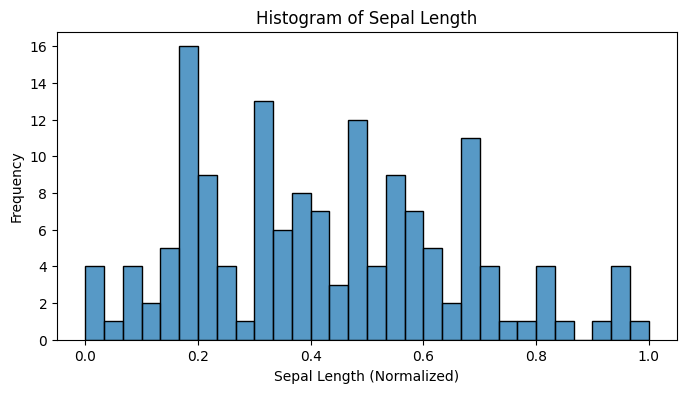

In [26]:
plt.figure(figsize=(8, 4))
sns.histplot(iris['SepalLengthCm'], bins=30)
plt.title("Histogram of Sepal Length")
plt.xlabel("Sepal Length (Normalized)")
plt.ylabel("Frequency")
plt.show()

In [27]:
# Univariate analysis on 'Species'
print("Frequency Distribution:")
iris['Species'].value_counts()

Frequency Distribution:


Species
Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: count, dtype: int64

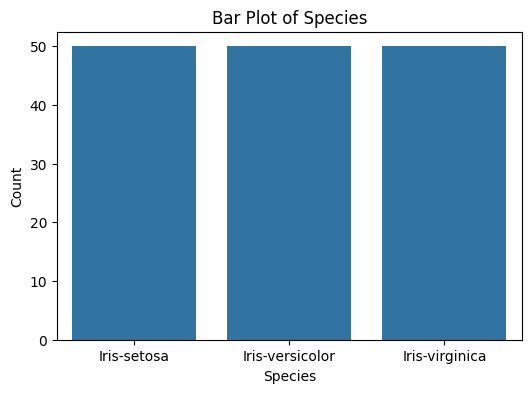

In [28]:
#Frequency Distribuion
plt.figure(figsize=(6, 4))
sns.countplot(x='Species', data=iris)
plt.title("Bar Plot of Species")
plt.xlabel("Species")
plt.ylabel("Count")
plt.show()

In [29]:
#ChiSquare
contingency_table = pd.crosstab(iris['Species'], iris['PetalLengthCat'])

# Perform the chi-square test
chi2, p, dof, expected = chi2_contingency(contingency_table)

# Display the results
print(f"Chi2 Statistic: {chi2}")
print(f"P-value: {p}")
print(f"Degrees of Freedom: {dof}")
print("Expected Frequencies:")
print(expected)

Chi2 Statistic: 259.2444977991196
P-value: 6.63421783779376e-55
Degrees of Freedom: 4
Expected Frequencies:
[[16.11409396 16.11409396 16.77181208]
 [16.44295302 16.44295302 17.11409396]
 [16.44295302 16.44295302 17.11409396]]


In [30]:
# Perform the chi-square test
chi2, p, dof, expected = chi2_contingency(contingency_table)

In [31]:
# Display the results
print(f"Chi2 Statistic: {chi2}")
print(f"P-value: {p}")
print(f"Degrees of Freedom: {dof}")
print("Expected Frequencies:")

print(expected)

Chi2 Statistic: 259.2444977991196
P-value: 6.63421783779376e-55
Degrees of Freedom: 4
Expected Frequencies:
[[16.11409396 16.11409396 16.77181208]
 [16.44295302 16.44295302 17.11409396]
 [16.44295302 16.44295302 17.11409396]]


In [ ]:
Light || BTCS-AMDS-SP7P